#  این فایل جواب قسمت پنج و چهار سوال است

In [42]:
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

import pandas as pd

In [43]:
torch.manual_seed(42)

# train function

In [44]:

def train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size,
                loss_function, activation_function, optimizer, epochs=100):
    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the MLP model
    class MLP(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.activation = activation_function
            self.fc2 = nn.Linear(hidden_size, output_size)
            self.softmax = nn.Softmax(dim=1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.activation(x)
            x = self.fc2(x)
            x = self.softmax(x)
            return x

    # Initialize the model
    model = MLP(input_size, hidden_size, output_size)

    # Define loss function and optimizer
    criterion = loss_function
    optimizer = optimizer(model.parameters(), lr=0.01)

    # Lists to store training and testing losses and accuracies
    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train_scaled, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train.values, dtype=torch.long))
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
            test_loss = criterion(test_outputs, torch.tensor(y_test.values, dtype=torch.long))

        # Append losses to the lists
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

        # Calculate accuracy and append to the list
        predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}, Test Loss: {test_loss.item()}, Accuracy: {accuracy}')

    # Evaluate the model
    with torch.no_grad():
        predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
       
    # Display various metrics
    print(" Display various metrics") 
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, predictions)}')
    print(f'Precision: {precision_score(y_test, predictions)}')
    print(f'Recall: {recall_score(y_test, predictions)}')
    print(f'F1 Score: {f1_score(y_test, predictions)}')
    print(f'ROC AUC Score: {roc_auc_score(y_test, predictions)}')
    print(f'Average Precision Score: {average_precision_score(y_test, predictions)}')

    # Plotting the training and testing losses
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss')
    plt.title('Training and Testing Losses Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting the accuracy
    plt.plot(range(1, epochs + 1), accuracies, label='Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    


    


# Train the model with different loss functions

Training with NLLLoss
Epoch [1/100], Loss: -0.5038191080093384, Test Loss: -0.526096761226654, Accuracy: 0.6428571428571429
Epoch [2/100], Loss: -0.5041378140449524, Test Loss: -0.5264245867729187, Accuracy: 0.6428571428571429
Epoch [3/100], Loss: -0.5044568181037903, Test Loss: -0.526753842830658, Accuracy: 0.6428571428571429
Epoch [4/100], Loss: -0.504776120185852, Test Loss: -0.5270830988883972, Accuracy: 0.6428571428571429
Epoch [5/100], Loss: -0.5050953030586243, Test Loss: -0.5274130702018738, Accuracy: 0.6428571428571429
Epoch [6/100], Loss: -0.5054149627685547, Test Loss: -0.5277451276779175, Accuracy: 0.6428571428571429
Epoch [7/100], Loss: -0.5057353377342224, Test Loss: -0.5280771851539612, Accuracy: 0.6666666666666666
Epoch [8/100], Loss: -0.5060556530952454, Test Loss: -0.5284098982810974, Accuracy: 0.6666666666666666
Epoch [9/100], Loss: -0.5063758492469788, Test Loss: -0.5287424921989441, Accuracy: 0.6666666666666666
Epoch [10/100], Loss: -0.5066952109336853, Test Loss: 

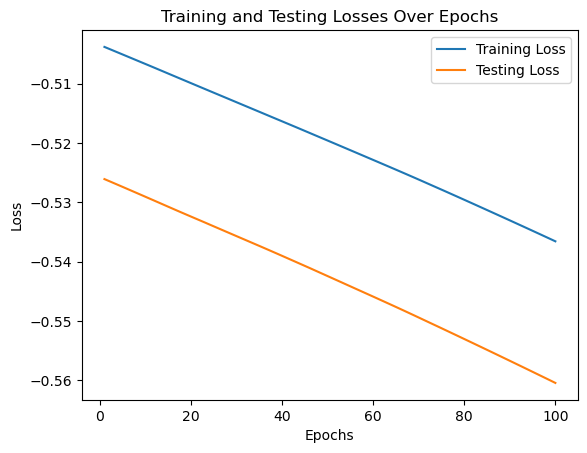

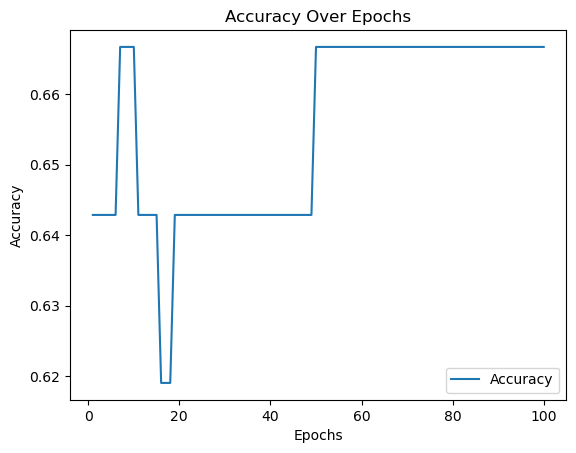

Training with CrossEntropyLoss
Epoch [1/100], Loss: 0.6748151779174805, Test Loss: 0.6590892672538757, Accuracy: 0.6190476190476191
Epoch [2/100], Loss: 0.674335777759552, Test Loss: 0.6585630178451538, Accuracy: 0.6190476190476191
Epoch [3/100], Loss: 0.6738575100898743, Test Loss: 0.6580394506454468, Accuracy: 0.6190476190476191
Epoch [4/100], Loss: 0.6733804941177368, Test Loss: 0.6575184464454651, Accuracy: 0.6428571428571429
Epoch [5/100], Loss: 0.6729048490524292, Test Loss: 0.6569990515708923, Accuracy: 0.6428571428571429
Epoch [6/100], Loss: 0.6724318265914917, Test Loss: 0.6564834117889404, Accuracy: 0.6428571428571429
Epoch [7/100], Loss: 0.6719608902931213, Test Loss: 0.6559691429138184, Accuracy: 0.6428571428571429
Epoch [8/100], Loss: 0.6714907884597778, Test Loss: 0.65545654296875, Accuracy: 0.6428571428571429
Epoch [9/100], Loss: 0.6710195541381836, Test Loss: 0.6549451351165771, Accuracy: 0.6428571428571429
Epoch [10/100], Loss: 0.6705486178398132, Test Loss: 0.65443336

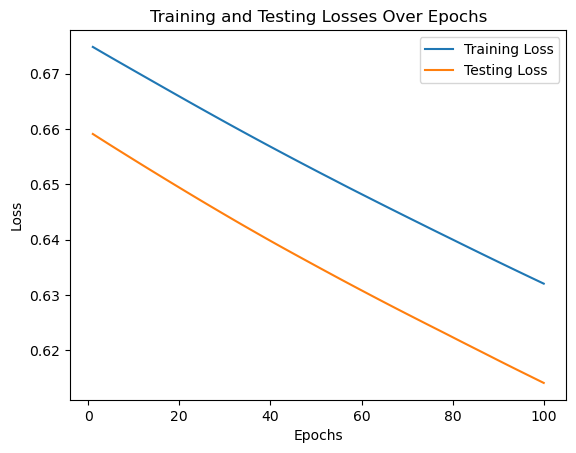

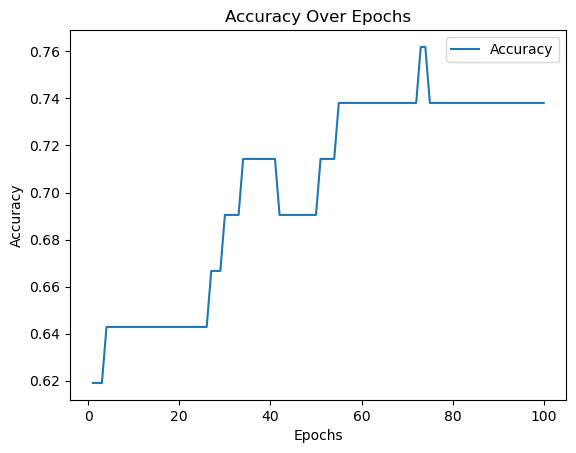

In [45]:


# Load data from the CSV file
file_path = "sonar.csv"
df = pd.read_csv(file_path, header=None)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to numerical values
label_mapping = {'R': 0, 'M': 1}
y_numeric = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Specify model parameters
input_size = X_train.shape[1]
hidden_size = 30
output_size = 2  # Number of classes

# Specify loss functions, activation function, and optimizer
activation_function = nn.ReLU()
optimizer = torch.optim.SGD

# Train the model with different loss functions
loss_functions = [nn.NLLLoss(), nn.CrossEntropyLoss()]

for loss_function in loss_functions:
    print(f"Training with {type(loss_function).__name__}")
    train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size,
                loss_function, activation_function, optimizer)
